In [1]:
!pip install -U opensimplex

In [2]:
import opensimplex 
import random
import numpy as np
import matplotlib.pyplot as plt


In [4]:


def create_noise(h, w, seed=2, FEATURE_SIZE=40, freq_sine = 8):
    
    size = w
    j = 0

    #simplex.seed(seed)

    array = np.zeros([h,w])
    for y in range(h):
        for x in range(w):
            array[x, y] = opensimplex.noise4(x=x/FEATURE_SIZE, y=y/FEATURE_SIZE, z=0.0, w=0.0)
            
    array = np.sin(array * freq_sine * np.pi)
    return array
    

    

In [105]:
def normalise(noise, max=255):
    #noise += 1 
    #noise /= 2
    noise *= max
    noise = np.clip(noise, -max, max)
    noise = noise.astype(int)
    return noise

In [137]:
def perturb(image, noise, budget):
    noise=np.expand_dims(normalise(noise, budget), -1)
    #noise = np.sign((noise - 0.5) * 2) * budget
    #noise = np.stack([noise,noise,noise], axis=-1)
    #noise = np.clip(noise, np.maximum(-image, -budget), np.minimum(255 - image, budget))
    return np.clip((noise + image).astype(np.uint8), 0, 255)

    

In [132]:
import glob 

In [133]:
pngPaths = glob.glob("latamSatData/datasetRGB/*/*/*.png")


In [134]:
testimg = np.array(plt.imread(pngPaths[25]) * 255).astype(np.uint8)

In [135]:
noise = create_noise(64,64, freq_sine=8, FEATURE_SIZE=20)

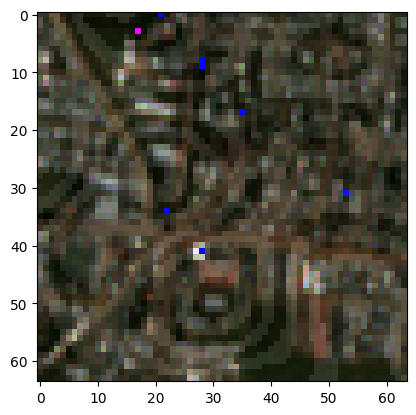

In [147]:
plt.imshow(perturb(testimg, noise, 12))

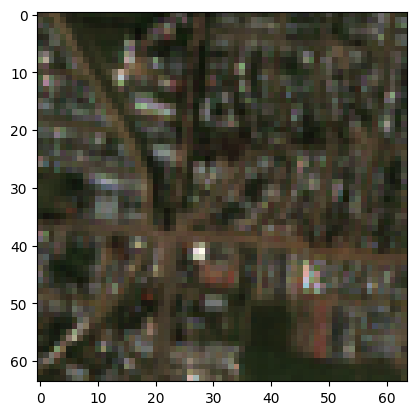

In [124]:
plt.imshow(testimg)